# Lab: Gradient Descent and Stochastic Gradient Descent

Import first all these librairies   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for nicer plots
sns.set_theme()

In this lab, we aim to apply GD and SGD to some particular functions

## I. Application on a one-dimensional case

We fist start with applying GD to the one-dimensional function: 
$$
f_1: w \mapsto w^2 -w/2+1- \log[1+\exp(w/2+1)].
$$


Q1. First plot this function on $[-1,1]$.

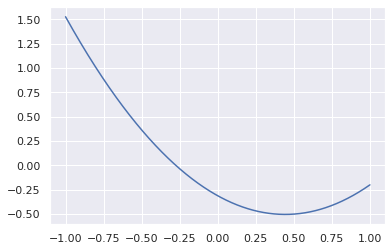

In [2]:
w= np.linspace(-1,1,1000)
fun1 = lambda w: w**2-w/2+1-np.log(1+np.exp(w/2+1))
f_w = fun1(w)

plt.plot(w,f_w)

Q2. Compute the derivative of $f_1$ and implement this  function.

In [3]:
fun1_der = lambda w: 2*w-1/2-(np.exp(w/2+1)/(1+np.exp(w/2+1)))/2


Q3. Is $f_1$ convex? 

Yes, since its second derivative is 
$$
w \mapsto (8 + 15 \mathrm{e}^{1 + w/2} + 8 \mathrm{e}^{2 + w})/(4 (1 + \mathrm{e}^{1 + w/2})^2)
$$

Q4. We aim to apply GD to $f_1$. Implement a function which takes as input 
- the derivative of the function to minimize
- an initial condition
- a stepsize/learning rate 
- a number of iterations

and ouputs

- the list of iterates of GD
- the list of the evaluations of the derivative of the function at the iterates

In [4]:
def gradient_descent(fun_der, w0, eta, n_iter):
    dim_w = len(w0)
    w_iterates = np.zeros(shape=(dim_w,n_iter+1))
    fun_der_iterates =  np.zeros(shape=(dim_w,n_iter+1))
    w_current = w0
    fun_der_current = fun_der(w0)
    w_iterates[:,0] = w_current
    fun_der_iterates[:,0] = fun_der_current
    for i in range(n_iter):
        w_current = w_current - eta*fun_der_current
        fun_der_current = fun_der(w_current)
        w_iterates[:,i+1] = w_current
        fun_der_iterates[:,i+1] = fun_der_current
    return w_iterates, fun_der_iterates

Q5. Apply GD to $f_1$ and plot the iterates and the functions at the iterates.

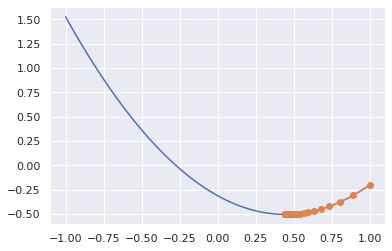

In [5]:
w_iterates, _ = gradient_descent(fun1_der, np.array([1]), 0.1, 100)
f_iterates = fun1(np.squeeze(w_iterates))

plt.plot(w,f_w)
plt.plot(np.squeeze(w_iterates),f_iterates,'o-')

Q6. (Optional) Estimate the rate of convergence of GD for $f_1$. To this end, only 100 hundred iterations are sufficient starting from $1$.

(0.0, 100.0)

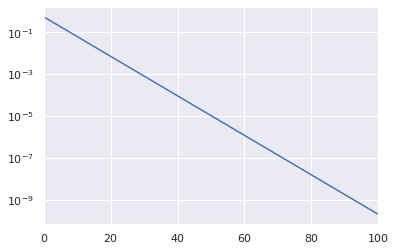

In [6]:
n_iter = 1000
w_iterates, _ = gradient_descent(fun1_der, np.array([1]), 0.1, 10000)
w_iterates = np.squeeze(w_iterates)
w_star = w_iterates[-1]

n_iter2 = 100
diff_w_list = np.zeros(shape=(n_iter2+1))
for i in range(n_iter2+1):
    w_i = w_iterates[i]
    diff_w = np.abs(w_star - w_i)
    diff_w_list[i] = diff_w

plt.semilogy(np.arange(n_iter2+1), diff_w_list)
plt.xlim([0,100])

We now consider the one-dimensional function: 
$$
f_2 : w \mapsto w^2 + \cos(2\pi w) -\log(1+4 w^2) +w.
$$
Q7. First plot this function on $[-3,3]$.

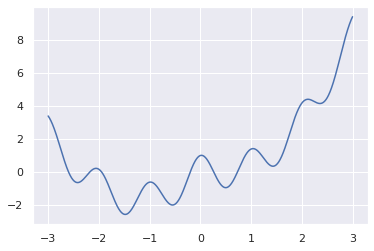

In [7]:
w= np.linspace(-3,3,1000)
fun2 = lambda w: w**2+np.cos(2*np.pi*w)-np.log(4*w**2+1)+w
f_w = fun2(w)
plt.plot(w,f_w)

Q8. Is this function is convex?

No

Q9. Apply GD using different initialization and plot the evaluation of $f_2$ at the resulting iterates.

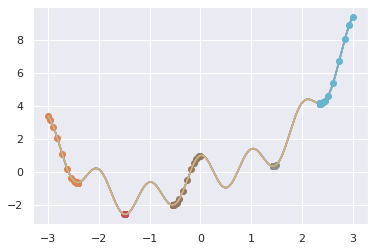

In [8]:
fun2_der = lambda w: 2*w-2*np.pi*np.sin(2*np.pi*w)-8*w/(4*w**2+1)+1

n_init = 5
w0_list = np.linspace(-3,3,n_init)
for i in range(n_init):
    w0 = w0_list[i]
    w_iterates, _ = gradient_descent(fun2_der, np.array([w0]), 0.01, 1000)
    f_iterates = fun2(np.squeeze(w_iterates))
    plt.plot(w,f_w)
    plt.plot(np.squeeze(w_iterates),f_iterates,'o-')

## II. Application on the Rosenbrock function

In this part, we consider the function
$$
f_3 : w \mapsto (w_1-1)^2 + 100(w_1^2-w_2)^2 \, ,
$$
called the Rosenbrock function.

Q10. Plot the contour lines of this function.

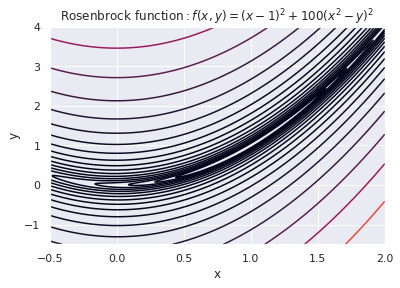

In [9]:
def rosenbrock_display(x, y): return (1 - x)**2 + 100 * (x**2 - y)**2


nx = 1000  # number of discretization points along the x-axis
ny = 1000  # number of discretization points along the y-axis
a = -0.5
b = 2.  # extreme points in the x-axis
c = -1.5
d = 4  # extreme points in the y-axis

X, Y = np.meshgrid(np.linspace(a, b, nx), np.linspace(c, d, ny))

Z = rosenbrock_display(X, Y)

CS = plt.contour(X, Y, Z, np.logspace(-0.5, 3.5, 20, base=10))
plt.title(r'$\mathrm{Rosenbrock \ function: } f(x,y)=(x-1)^2+100(x^2 - y)^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.show()

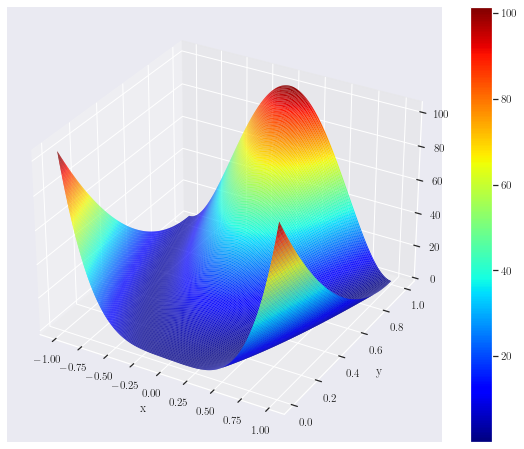

In [13]:
from numpy import meshgrid

nx = 200  # number of discretization points along the x-axis
ny = nx  # number of discretization points along the y-axis
a = -1
b = 1  # extreme points in the x-axis
c = 0
d = 1  # extreme points in the y-axis

X, Y = np.meshgrid(np.linspace(a, b, nx), np.linspace(c, d, ny))

Z = rosenbrock_display(X, Y)

# Initialize 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Plot
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Colorbar
plt.rcParams['axes.grid'] = False
fig.colorbar(surf);
plt.rcParams['axes.grid'] = True

Q11. Is $f_3$ admits a unique minimizer? If so find it.

Q12. Apply GD to $f_3$ for different choice of learning rates and starting from $w_0 = (-1,1)$. Comment your results.

[-1.         -0.996      -0.99518883 -0.99438401 -0.99357853 -0.99277233
 -0.99196542 -0.99115778 -0.99034942 -0.98954034 -0.98873054]


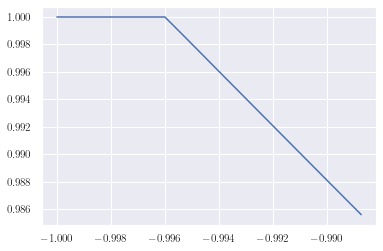

In [11]:
def rosenbrock(x):
    y = np.asarray(x)
    return np.sum((y[0] - 1)**2 + 100 * (y[1] - y[0]**2)**2)


def rosenbrock_grad(x):
    y = np.asarray(x)
    grad = np.zeros_like(y)
    grad[0] = 400 * y[0] * (y[0]**2 - y[1]) + 2 * (y[0] - 1)
    grad[1] = 200 * (y[1] - y[0]**2)
    return grad

lr = 10**-3
n_iter = 10
w0 = np.array([-1, 1])
w_iterates, _ = gradient_descent(rosenbrock_grad, w0, lr, n_iter)

all_x_i = w_iterates[0,:]
all_y_i = w_iterates[1,:]

print(all_x_i)
plt.plot(all_x_i, all_y_i)

#plt.show()

Text(0, 0.5, 'y')

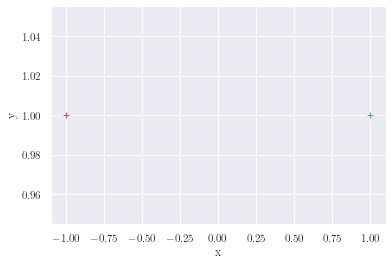

In [12]:
plt.plot(w0[0], w0[1], 'r+')
plt.plot([1], [1], 'g+')
#plt.title(
#    r'$\mathrm{Rosenbrock \ minimization: fixed \ step \ size \ gradient}$')
plt.xlabel('x')
plt.ylabel('y')
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
